# WHO IS WILLING TO CHANGE THE JOB?
***


## Table of Contents

***
1. [Abstract](#header1)
2. [Introduction](#header2)
3. [Methods](#header3)
4. [Results](#header4)
5. [Discussion & Conclusion](#header5)
6. [References](#header6)

<a name="header1"></a>
# **1. Abstract**
***
The study explores data from applicants that a company is looking to hire for Data Science positions.
As a result, characteristics of applicants have been identified that are relevant for the decision
whether they are willing to change jobs. Understanding these factors is critical as more candidates
turn down job offers. In the analysis of Kaggle's data set patterns from a machine learning model
were used and the stochastic independence of the relevant predictors identified was evaluated.
The strongest predictive effect was found with the development index of the city where an applicant
lives. It outweighs the predictive power of other relevant variables from the domains 'company type'
and 'education'.
The results confirm publications on the relationship between changing jobs and e.g., education level
and tech industry characteristics. However, the strong impact of a city's development index is a new
finding and raises questions beyond the recruitment of data scientists.

<a name="header2"></a>
# **2. Introduction**
***
Today, the labor market is characterized by an increasing battle for talent, and the talent being
fought over is becoming increasingly selective. As an employer, you are therefore pleased when you
have successfully identified a suitable candidate in this battle. How frustrating it is then when this
candidate does not accept the offer. Adding to the frustration is the further cost in terms of
additional days or weeks that recruiters, hiring managers, and interviewers invest in the continued
search. According to a study by Glassdoor [[1]](#1), candidates in the U.S. reject job offers 17.3% of the
time. In the technical industry, this rate is as high as 19.4%, as candidates in this industry are in the
comfortable situation of often being able to pick the most suitable one for them from various offers.
So, the problem is recognized, but how to reduce the high rejection rate is still unknown. Previous
publications have mainly focused on the motivators why an employee leaves the current job, such as
lack of opportunity, bad management, and toxic workplace culture [[2]](#2). These can explain retention
risks and why people look for a new job. What is unknown, however, is what characteristics and
demographics inherent in the candidate drive the willingness to change jobs - regardless of the
situation of the current job. I hypothesize that there are characteristics, experiences, demographic
facts that make someone willing to change jobs. So, the important question is: Who is willing to
change the job?<br><br>
In my report, I investigated this question and used a data set about candidates a company wants to
hire for Data Science jobs. I examined this data for correlations and patterns and validated the
results. I used methods of descriptive and inferential statistics [[3]](#3)[[4]](#4). However, to make the patterns
more explicit, I additionally applied state-of-the-art methods from machine learning. With a powerful
algorithm, a model was created based on the variables of the data set. In this model, I evaluated the
importance of each candidate&#39;s characteristics and visualized them. By combining feature
identification based on a machine learning model, significance testing, and regression analysis
through classical mathematical statistics, I could identify those facts about demographics, education,
and work experience - embedded in the person of the candidate - that relates to the willingness to
change jobs.

<a name="header3"></a>
# **3. Methods**
***

Before we get started, we need to import Python libraries. The library versions that are important to reproduce are printed

In [4]:
# general sys modules / libraries
import sys
import warnings  
warnings.filterwarnings('ignore') 

# data analysis and visualisation modules / libraries
import numpy as np
from numpy import loadtxt

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter


import seaborn as sns

import scipy.stats as scs
from scipy import stats

# machine learning modules / libraries
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from imblearn.over_sampling import RandomOverSampler

import sklearn as sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import nbimporter

# Printing the version names for improving reproducibility 
print("Python version: {}".format(sys.version))
print("NumPy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("seaborn version: {}".format(sns.__version__))
print("scikit-learn version: {}".format(sklearn.__version__))
print("XGBoost version: {}".format(xgb.__version__))

Python version: 3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) 
[Clang 6.0 (clang-600.0.57)]
NumPy version: 1.20.1
pandas version: 1.2.2
matplotlib version: 3.4.0
seaborn version: 0.11.1
scikit-learn version: 0.24.1
XGBoost version: 1.4.0


We also need to import data files and functions from other Jupyter notebooks.

In [5]:
data  = 'datasets/aug_train.csv'
train = pd.read_csv(data)

data = 'datasets/train_clean.csv'
train_clean = pd.read_csv(data)

data = 'datasets/train_model.csv'
train_model = pd.read_csv(data)

data = 'datasets/train_cat_graph.csv'
train_cat_graph = pd.read_csv(data)

data = 'datasets/train_binary.csv'
train_binary= pd.read_csv(data)

In [6]:
from ipynb.fs.full.PLOT_FUNCTIONS import show_raw_data, countplot, plot_imbalance, show_clean_data, show_binary_data, displot_median_mean_th, displot_median_mean_cdi, freq_candidate, h_freq_candidate_c, prop_candidate, regplot, pie_plot_cs_no_info, cat_plot
from ipynb.fs.full.SHAP_VALUES import shap_summary_bar, shap_pos_neg       

The data set is provided by the Data Science website [kaggle.com](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists). The owner of the
data set is Moebius - a Data Scientist at Healthcare. He created it on 2020-12-07. No information is
available on how the data was collected. The data set includes data from job applicants at a company
looking to hire new employees in the Data Science field. To attract potential candidates to the
company, it offers training in Data Science.
The data includes information on demographics, education, and experience from the candidate&#39;s
application and enrollment. The data set has data from 19,158 candidates regarding 14 variables – 13
independent and one dependent variable. After reading the data, the next step is to sift through the
raw data (Table 1) and analyze the variables.

In [7]:
show_raw_data()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**Table 1:** Random sample from the raw data set, which includes 13 independent variables and
one dependent variable (target).
***

## 3.1. The Data Set
***
This section describes how a variable relates to the target variable in each case and what role a
variable plays in the entire data set is highlighted. I will identify things that need to be cleaned up and
pre-processed. These actions for preparation are noted in the text and implemented at the end of
the section.


**Variable 'target':** I start with this variable because it is the dependent variable I refer to when
describing the other variables. 'Target' describes whether a candidate decides to change jobs or not.
It is a 64-bit float data type and is at a nominal scale level. The binary variable has the two categories
'1.0' for 'willing to change job' and '0.0' for 'not willing to change job'. The variable has no NaN or Null
values. All other variables are related to this variable to analyze the association each variable with a
possible job change. In the whole data set, there are 14,381 candidates with 'not willing to change
job' and 4,777 with 'willing to change job' (Figure 1). Thus, the target rate in the entire data set is
24.93%. That means, the data set is imbalanced [[5]](#5).

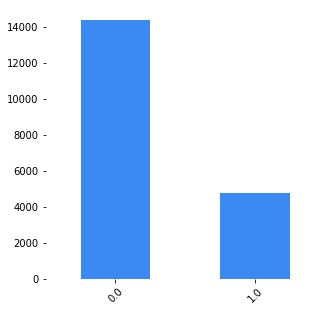

In [8]:
countplot('target')

**Figure 1:** Distribution of the variable 'target': 0.0 = 'not willing to change job' and 1.0= 'willing to
change job'
***

**Variable 'enrollee_id':** With the help of this variable, we can identify the single record of a
candidate. The creator of the record does not describe it, but we can assume that the enrollee_id
was used as a continuous identification number. In this case, the variable can give information about
the order of the candidates and is on an ordinal scale level. The data type is a 64-bit integer. It has
neither NaN nor Null values. This variable can be used as the reference point for the sum of all rows
in the data set. For the following analysis, the variable will not be relevant.


**Variable 'city':** The variable 'city' describes the city where a candidate lives. The creator of the
data set does not tell us which cities are represented. 'City' is an object data type consisting of the
prefix 'city_' and three digits. The variable is at a nominal scale level. The variable has 123 unique values and no NaN or Null values. This variable can be easier sorted without the prefix 'city_'.
Therefore, it will be removed from the categories' names (Prep 1).


**Variable 'city_development_index':** We learn about the development index of the respective
city in this variable. On the Kaggle website, we do not find any further information about this
variable. We can assume that it means the index developed for the Second United Nations
Conference on Human Settlements in 1996, which reflects the level of development of a city [[6]](#6). It is
the averaged value of five indices: infrastructure (water supply, sewerage, electricity, and
telephone), waste (wastewater treated and solid waste disposal), health system (life expectancy and
child mortality), education (literacy and combined enrolment), and average household income. The
variable is a 64-bit float data type and is at cardinal scale level. The data set has 93 unique values and
no NaN or Null values. For working with this variable, it may be useful to create a separate variable
that has the 93 categories converted into fewer categories by rounding (Prep 2).


**Variable 'gender':** This variable describes the gender of a candidate. The variable is an object
data type and is at a nominal scale level. The variable has three unique values (Male, Female, Other)
and 23.53% of the data set has a NaN value at Gender.
Prep 3: Conversion of the NaN values into 'no info'.


**Variable 'relevent_experience'[[*]](#comment):** Whether a candidate has relevant experience in Data Science
or not this is indicated by 'relevent_experience'. We do not know from the creator of the data set
how the experience level was determined and whether it is based on a self-assessment or an
external assessment. The variable is at the ordinal scale level because there is a logical ranking of the
two categories of the binary variable. It has no NaN or Null values.


**Variable 'enrolled_university':** This variable describes the type of enrolled program if the
candidate studied at a university. It is an object data type and has three unique values
(no_enrollment, Full time [[*]](#comment) course, Part time [[*]](#comment) course). It is at an ordinal scale level because there
is a logical ranking of the three categories. There are 386 NaN cases, which is 2.01% of the total data
set.
Prep 4: Drop of the NaN values for 'enrolled_university'.


**Variable 'education_level':** We get the highest education level of each candidate from the
variable 'education_level'. It is an object data type and has five unique values (Primary School, High
School, Masters, Graduate, and Phd[[*]](#comment)). It is at an ordinal scale level as there is a logical ranking of
the five categories. There are 460 NaN cases, which is 2.4% of the total data set.
Prep 5: Drop of the NaN values for 'education_level'.


**Variable 'major_discipline':** Which major discipline a candidate has chosen in the education, we
can find in this variable. The variable is an object data type and has six unique values (STEM,
Humanities, Business Degree, Arts, Other, and No Major). It is at a nominal scale level. There are
2813 NaN cases.
Prep 6: Conversion of NaN values into 'no info'.


**Variable 'experience':** This variable shows us how many years of work experience a candidate
has. The variable is an object data type and has 22 unique values (&lt;1, from 1 to 20, and &gt;20) and is at
ordinal scale level. There are 65 NaN cases, and they can be dropped (Prep 7). For working with this
variable, it may be useful to create a separate variable that has the 22 categories converted into
fewer categories by clustering (Prep 8).


**Variable 'company_size':** This variable tells us the size of the company where a candidate is
currently employed – size in terms of the number of employees employed. Although it would have
been possible to formulate this variable at a cardinal scale level, the designer of the data set chose to
name the smallest and largest categories nonspecifically, giving the variable an ordinal scale level.
The variable is an object data type and has eight unique values. There are 5938 NaN cases.
Prep 9: Drop of the NaN values for 'company_size'.


**Variable 'company_type':** This variable tells us what type of company the candidate is currently
employed in. The variable is at a nominal scale level and has six unique categories ('Pvt Ltd', 'Funded
Startup', 'Public Sector', 'Early Stage Startup', 'NGO', and 'Other'). Again, we find many NaN cases
(6140), accounting for 32.05% of the total data set. The overlap significantly with the NaN values of
‘company_size’.
Prep 10: Conversion of NaN values into 'no info'.


**Variable 'last_new_job':** The variable is not exactly defined. In the discussion forum of the
Kaggle website, there are different interpretations. The most reasonable one is the difference in
years between the start date of the previous job and the start date of the current job. It seems most
meaningful to interpret this difference as the length of employment in the current job, but a
remaining uncertainty exists about the meaning of this variable. The variable is at the ordinal scale
level and has six unique categories ('never', 1-4, and '&gt;4'). There are few NaN cases (423).
Prep 11: Drop of the NaN values for 'last_new_job'.


**Variable 'training_hours':** In this variable we can see how much time a candidate spent on
training offered in Data Science. It is unclear how accurately the time was measured and whether the
candidate measured it or it was recorded by a system. The variable is at cardinal scale level, has 241
unique categories, and no NaN or Null values. For working with this variable, it is recommended to
create a separate variable that has the 241 categories converted into fewer categories by clustering
in training weeks of 40 hours each (Prep 12).
I have already classified the data set as imbalanced concerning the target variable. On top, looking at
the data set as a whole, we can see that the frequencies regarding 'willing to change job' are
unevenly distributed within the categories for eight of the 13 independent variables (Figure 2). We
have to deal with this situation later in this 'Method' section.

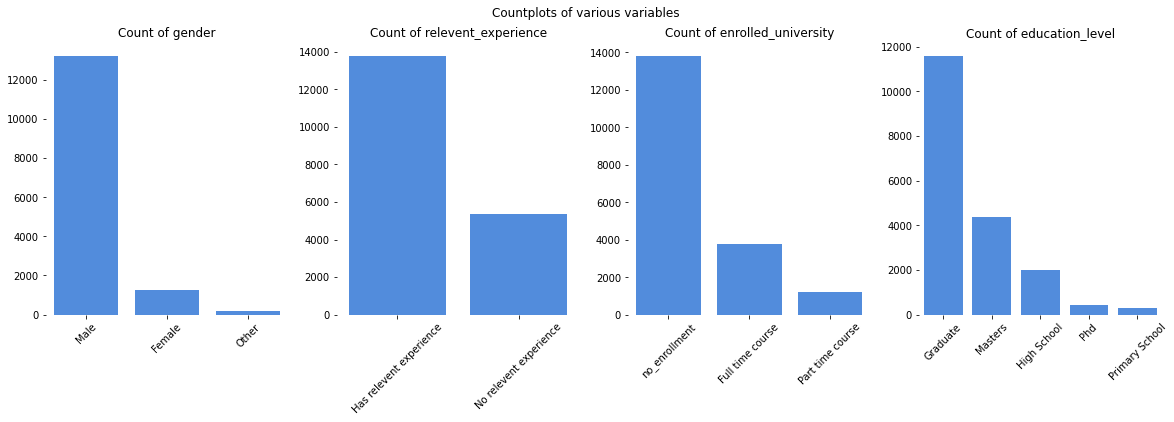

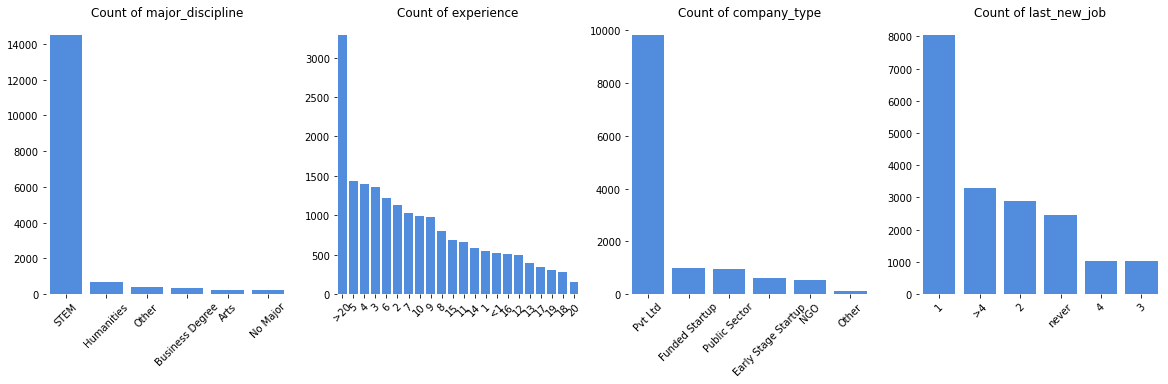

In [9]:
plot_imbalance()

**Figure 2:** Frequencies of 'willing to change job': unevenly distributed within the categories of
eight independent variables.
***

I have identified things that need to be cleaned up and pre-processed. After the twelve preparational
actions have been transformed, the data set looks very tidy (Table 2). This data set will be used for
the descriptive statistical part of the 'Method' section.

In [10]:
show_clean_data()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,cdi_round,experience_group,training_ten_hours
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,no info,no info,1,36,1.0,0.9,>20,0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0.8,11-15,40
2,11561,21,0.624,no info,No relevent experience,Full time course,Graduate,STEM,5,no info,no info,never,83,0.0,0.6,5-10,80
3,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0.8,>20,0
4,21651,176,0.764,no info,Has relevent experience,Part time course,Graduate,STEM,11,no info,no info,1,24,1.0,0.8,11-15,0


**Table 2:** Random sample from the data set after cleaning and pre-processing the data.
***

Additionally, in the later part of the 'Method' section, we will see that we require the variables and their categories to be in a different format to use them for Machine Learning: We need each category in each variable to be a separate feature that is either true (1) or false (0). Therefore, each of the categories of the
variables must become single, binary variables. This transformation (Prep 13) affects all independent
variables. Furthermore, the variable 'enrollee_id' will be removed from the data set because it
cannot give us any insight into the model. Table 3 shows how the data set looks like after Prep 13 has
been executed.

In [11]:
show_binary_data()

,city,city_development_index,training_hours,target,cdi_round,training_ten_hours,Female,Male,Gender_other,Experience_in_data_science,...,Currently_in_NGO,Currently_in_other_company_type,Currently_in_Public_Sector,Currently_in_Pvt_Ltd,1_year_between_previous_and_current_job,2_years_between_previous_and_current_job,3_years_between_previous_and_current_job,4_years_between_previous_and_current_job,More_than_4_years_between_previous_and_current_job,Last_new_job_never
0,103,0.920,36,1.0,0.9,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,40,0.776,47,0.0,0.8,40,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,21,0.624,83,0.0,0.6,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,162,0.767,8,0.0,0.8,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,176,0.764,24,1.0,0.8,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


**Table 3:** Random sample from the data set after converting each of the categories of the
variables into single, binary variables.
***

>**Please note:**\
The process of how data cleansing is performed can be found in the jupyter notebook about [data cleaning](DATA_CLEANING.ipynb).

## 3.2. The Data Analysis Process
***
The scale level of the independent variables ranges from nominal to ordinal to cardinal. Only the
variables 'training_hours' and 'city_development_index' are at the highest scale level, the other
variables are at ordinal and nominal scale level. The statistical procedures are not upward compatible
but downward compatible in terms of scale level. This means the nominally scaled variables
determine the analysis options for the data.


The data analysis is executed in three analysis steps, that are visualized in Figure 3:

<p><img style="float: left;margin:5px 5px 5px 5px" width="700" height="800" src="./Analysis_approach_3_steps.png"></p>

**Figure 3:** Overview of the data analysis process in three steps.
***

The analysis process will ensure that we identify the importance of variables in patterns and
relationships on which a machine-learning model is based, evaluate the stochastic independence of
the obtained results, review them, and verify results for the cardinal variables.
As an outcome, there will be a set of only those variables that are relevant for predicting whether a
candidate is willing to change job and for which a test has shown that the correlation with the
dependent variable is not random.

## 3.3. Machine learning
***
The idea is that the existing data set is used to train an accurate machine learning model. In this
model, I proceed to examine the patterns and relationships on which the model is based. We can use
these patterns to identify which variables have high and which have low importance concerning the
target variable.

### 3.3.1. The Concept of the Model
***

A popular machine learning library is Extreme Gradient Boosting (XGBoost) [[7]](#7). It is an ensemble
learning method that relies on the outputs of many models to make a final prediction. Each model is
called a 'base learner'. The XGBoost algorithm uses, adapts, and combines many base learners to
make a final prediction based on the whole algorithm. XGBoost takes advantage of trees as base
learners. It starts with a single question that is checked at each decision node, and each node has
only 2 possible options.


The data is further split into subgroups at each node. The goal is to divide the data in a way that the
information becomes less impure. Reducing information impurity means that a clear prediction can
be made concerning the target variable. A perfect split would be if one option predicted 0% and the
other 100% the presence of the target variable - in this case, there would not remain any information
impurity at all. A poor split or weak 'learner' would predict a 50% probability for each of the two
options - it is considered a weak learner because it would not make the information any clearer. The
model branches the decision trees as long as this reduces information impurity. At the bottom of
each decision tree, there is a single possible decision left.


XGBoost tries to reduce the variance of each base learner. This is done by a meta-algorithm called
boosting. Boosting can also be used to arbitrarily combine different weak learners into one strong
learner. The resulting model will be based on only one concrete data set. That can lead to a risk that
the decision trees and the associated rules correspond too closely to this data set. The consequence
of this so-called overfitting would be that the predictive power of the model is limited for further
data sets outside the training data set [[8]](#8). To avoid this, I need to tune the model. I can make this
adjustment using hyperparameters. Key hyperparameters for which the settings should be
determined include [[9]](#9):
- learning rate: it affects how fast the model achieves a reduction in remaining error (default: 0.3). A
reduction can be achieved with many boosting rounds and a low learning rate per round, or with few
boosting rounds and a high learning rate.
- max_depth: it affects how deep each tree is allowed to grow during a given boosting round (default:
6). A very deep tree uses a high proportion of the data set - where there is a risk that the final model
will be too specific to the data set - i.e. overfitting will occur. Conversely, a shallow tree based on a
too-small proportion of the data set can lead to underfitting.
- min_child_weight: can be high or low (default: 1). The minimum sum of a child's weight serves as a
decision value in branching processes. If the min_child_weight would be undercut by a further
branching, this next branching step is stopped. This parameter controls that the model is not too
strongly tailored to the data set.


The configuration of maximum tree depth and minimum child weight, which balance underfitting and
overfitting, and appropriate learning rate can be determined simultaneously using a method called
GridSearch. It examines all x times y possible parameter configurations of the x-many parameters
with their y-many possible values. The result is the parameter configuration that leads to the best-
predicted value of the model.


To check how well the model with the finetuned hyperparameters can explain the data, I applied it to
a test data set. For comparison, I also applied an XGBoost model with default hyperparameters and a
dummy model (random labels on the target variable given the class distribution of the training data)
to this data set [[10]](#10). I then compared the average performance scores and standard deviation values
for each model.

### 3.3.2. Training of the Model
***
As mentioned in the 'Data Set' section, we face the issue of an imbalanced data set. We should apply
data sampling methods before we start training the model to overcome the imbalanced classification
of the target variable. For this purpose, the RandomOverSampling method from the imblearn library
is used. After the oversampling [[11]](#11)[[12]](#12), the target variable has the same number of observations for
'not willing to change job' and 'willing to change job' and we are ready to start the training. To train
the model, XGBoost is applied to the data set from which a sample is shown in Table 3. Finetuning
the hyperparameters using GridSearch resulted in the configuration of maximum tree depth and
minimum child weight, and appropriate learning rate that is shown in Table 4:

Hyperparameter name | value after finetuning with GridSearch
:--- | ---: 
learning rate | 0.1  
max depth | 3  
min child weight | 3 

**Table 4:** Resulting configuration of maximum tree depth, minimum child weight, and learning
rate.
***


### 3.3.3. Evaluation of the Model
***
We want to use the XGBoost model for a further analysis – but is it a good model and can it correctly
predict known data? To check this, we can look at the accuracy value of the model and also perform
cross-validation of training and test data [[13]](#13)[[14]](#14)[[15]](#15). Setting the parameters according to the
identified configuration in the model results in an accuracy of 78.77%. The accuracy of a model
represents the number of correctly classified data instances in relation to the total number of data
instances. The value of 78.77% cannot be rated as sufficient. The cross-validation of training and test
data can additionally evaluate the model. Cross-validation is an approach to test the performance of
an algorithm on unseen data. The results of the cross-validation with three different models are
shown in Table 5.

We can see that the model has no overfitting problem because the performance of XGBoost_tuned
on the test data set is comparable to that on the training data set. The model is robust because the
standard deviation of XGBoost_tuned is low for both the test data set and the training data set. The
optimization of the hyperparameters has brought a small performance gain that becomes visible in
the comparison of the performance mean in the test data for XGBoost_tuned versus
XGBoost_standard (0.797 vs 0.789). The XGBoost_tuned model has a substantially higher
performance than the Random model (0.797 vs 0.625).
The result of the evaluation is that we can use the model well to explain the data.

<p><img style="float: left;margin:5px 20px 5px 1px" src="./JN_Cross_Validation.png"></p>

**Table 5:** Cross-validation of training and test data of the XGBoost_tuned model and compared to
the XGBoost_standard and Random_model.
***

>**Please note:**\
The process of how the model was built, trained and evaluated can be found in the jupyter notebook about [XGBoost modelling](XGBOOTS_MODELLING.ipynb).

### 3.3.4. Deriving Insights from the Model
***
Analyzing the model will show us the underlying patterns and relationships. To analyze what
decisions our complex models make, we can use SHAP values [[16]](#16)[[17]](#17). SHAP values highlight the
contribution that each predictor variable has to the dependent variable. A contribution can be
negative and positive. SHAP values are usually presented in a plot that shows how significant a
predictor variable is relative to all predictor variables and whether the effect is associated with a
higher or lower prediction. The SHAP values will help us to identify the variables with high relevance
for the model prediction.


To further refine the result, it makes sense to finally convert the variables that are either at cardinal
level or variables with many categories into binary variables, too.
The range of values of the variable 'training_hours' is from 0 to over 366. Based on the median and
mean -shown in Figure 4 - it is useful to divide the variable into 'under 40 hours of training' and 'over
40 hours of training' (to stick with the idea of training week à 40 hours as a good cluster
measurement).


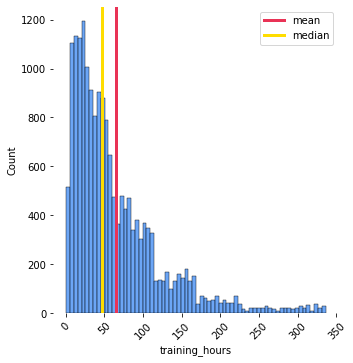

In [31]:
displot_median_mean_th()

**Figure 4:** Distribution of the values of the variable 'training_hours' and the position of median
and mean.
***

The range of the values of the variable 'city_development_index' goes from 0.45 to 0.95. Figure 5
also shows the position of median and mean, but at the same time, you can see a peek at an index
value of 0.6. To see patterns more clearly, you can round the city development index to one decimal
place and then convert the variable into two subgroups - 'city development index &lt;= 0.6' and 'city
development index &gt;0.6'.

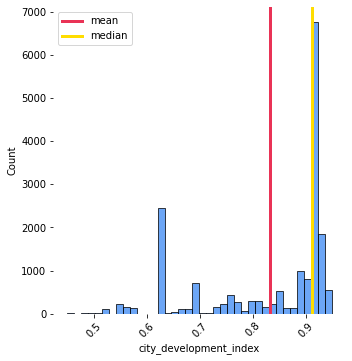

In [13]:
displot_median_mean_cdi()

**Figure 5:** Distribution of the values of the variable 'city_development_index' and the position of
median and mean.
***

The distribution of categories for the variable 'city' can be seen in Figure 6.

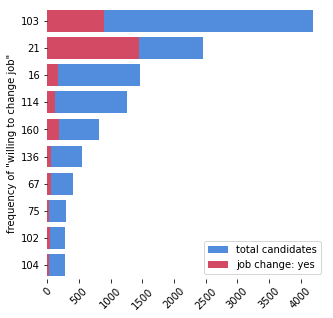

In [14]:
h_freq_candidate_c('city')

**Figure 6:** The ten cities the most candidates come from (blue) and the count of candidates in
those cities who are willing to change jobs (red).
***

While most of the candidates come from 'city 103', most of the candidates willing to change the job
come from 'city 21'. We might gain deeper insights if we transform the variable 'city' into two
subgroups - 'city is city 21' and 'city is not city 21'.
We can now use the XGBoost algorithm to build a model of the data set consisting entirely of binary
variables. The SHAP values from this model will help us to identify the variables with the highest
relevance for the model prediction.

>**Please note:**\
The process of how SHAP values were derived from the model can be found in the jupyter notebook about [SHAP-values](SHAP_VALUES.ipynb).

## 3.4. Chi²-test
***
At the nominal scale level, we can use the chi²-test for stochastic independence as a measure of
correlation. A chi²-test can be used to test whether a correlation between two variables is random or
non-random and the analysis is based on frequencies. The check should be performed on those
variables whose SHAP values in the analysis of the XGBoost model showed that their contribution to
the dependent variable is relevant. The result of the test will help us to identify contributing variables
that also correlate significantly with the dependent variable. We can ignore independent variables
without a significant correlation, even if they have been shown in the model to be proportionally
relevant to the prediction.
A relevant contribution in the model but a non-significant correlation with the dependent variable
can occur and this is not an error. One explanation could be that XGBoost combines weak learners
into arbitrary strong learners while developing the model. This is helpful for the model, but it does
not make the weak learner per se strong and thus does not make the correlation of the individual
variable significant.

>**Please note:**\
The process of how the stochastic independence was evaluated for all variables can be found in the jupyter notebook about [chi²-test](CHI2_TEST.ipynb).

## 3.5. Descriptive and Inferential Statistics
***
While descriptive statistics only describe data, we can use inferential statistics to conclude from this
data. For most of the variables, the evaluations are limited to counts and frequency distributions
because of the low scale level the variables have.
Count plots and bar plots from the Seaborn library are particularly suitable for visualization. For
variables with more than ten categories, it makes sense to focus on the first ten results in descending
order. Additional insights can be gained by visualizing the percentage of 'willing to change job' for
each variable in a bar plot.
For cardinally scaled variables, a logistic regression can be calculated [[18]](#18). The logistic regression is a
special case of the regression analysis because here dichotomous variables (0 or 1) can be predicted.


>**Please note:**\
The process of how the statistics were calculated and visualised can be found in the jupyter notebook about [functions & plots](PLOT_FUNCTIONS.ipynb).

# <a name="header4"></a>
# **4. Results**
***
With state-of-the-art machine learning methods, I identified SHAP values that highlight the
contribution that predictor variables have to the dependent variable. Figure 7 shows a variable
importance plot that ranks the most significant variables in descending order. The upper variables
contribute more to the model than the lower ones and hence have a high prediction value. The
ranking shows the SHAP values for 20 binary variables derived from the original variables. The first

ten all have high to medium feature values. Feature value describes the value for a given
independent variable in the prediction model compared to the prediction if that variable had a
baseline value [[19]](#19). The following ten variables have a decreasing feature value up to low. Therefore,
I focused on the first ten results. The relevant variables are related with the original independent
variables 'city_development_index', 'company_size', 'company_type', 'education_level',
'relevent_experience', 'last_new_job', 'experience', and 'enrolled_university'.

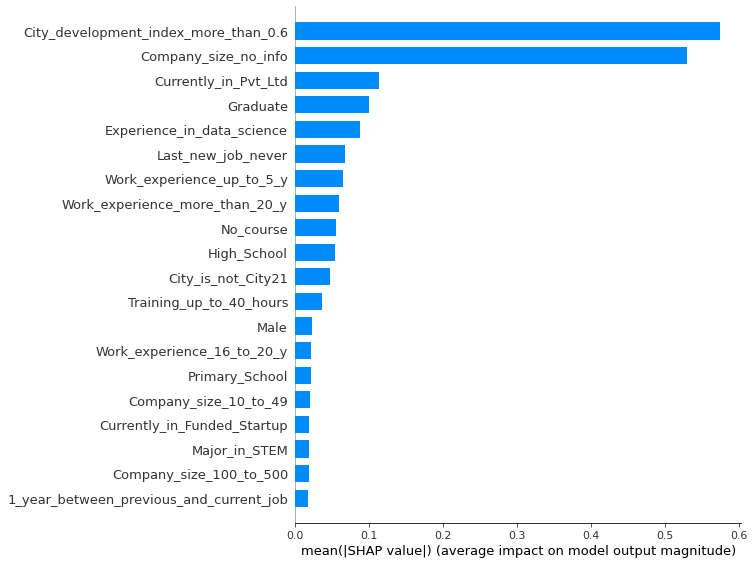

In [26]:
shap_summary_bar()

**Figure 7:** SHAP summary plot for the most relevant variables.
***

For all these variables, I checked if the variables had a significant result in the chi² test. In Table 6 we
see that all of them have significant correlations with the dependent variable.

Variable name | Chi<sup>2</sup> value | p-value | significant?
:--- | ---: | ---: | ---:
1. City development Index: more than 0.6 | 2322.83 | < .001 | significant
2. Company size: no info | 1174.03 |  < .001 | significant
3. Company type of current employer: Pvt Ltd | 509.31 | < .001 | significant
4. Education level: Graduate | 135.98 |  < .001 | significant
5. Relevant Experience in Data Science: has experience | 329.98 | < .001 | significant
6. Last new job: never | 59.71 | < .001 | significant
7. Work Experience: up to 5 years | 395.00 | < .001 | significant
8. Work Experience: more than 20 years | 178.6 | < .001 | significant
9. Enrolled University: no course | 344.08 | < .001 | significant
10. Education level: Graduate |  29.03|   < .001 | significant

**Table 6:** Results of the chi² tests of the ten variables with the highest SHAP values.
***

A significant chi² test does not tell us anything about the extent of the correlation. However, it
provides no reason why not to continue with the SHAP values. The SHAP summary plot in Figure 8
shows the positive and negative associations of the predictors with the dependent variable.

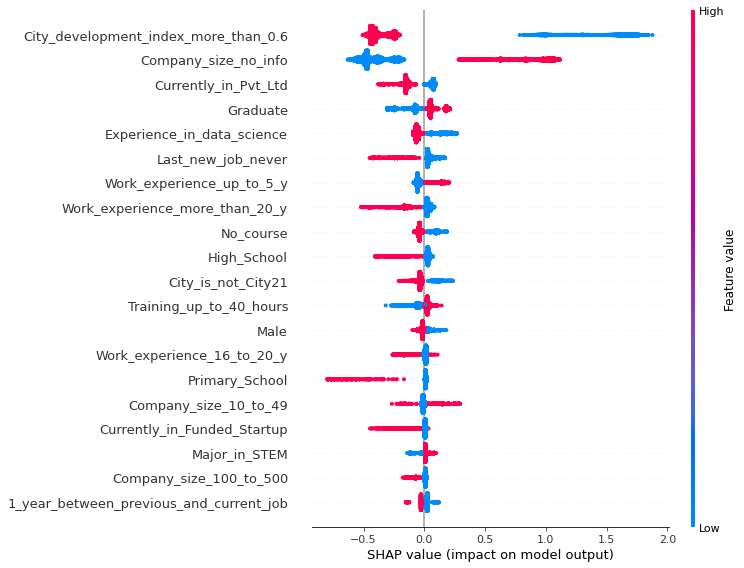

In [15]:
shap_pos_neg()

**Figure 8:** SHAP summary plot for the most relevant variables including positive and negative
associations with the dependent variable.
***

Again, the variables are ordered by their importance in descending order. The horizontal position of
each predictor shows whether the effect of that value is associated with a higher or lower prediction.
The color shows whether the value for this variable is high (red) or low (blue).

## 4.1. Results to the city development index
***
Taking the top variable 'city-development_index_more_than_0.6', we can see that the variable has
the highest importance for the model (located at the top) and most of the values are negative (left of
0 value) and high (red). This means that candidates coming from a city with a development index
higher than 0.6 (red) are less willing (left of 0 vaue) to change jobs.

The calculation of the logistic regression (based on the raw data) supports this result. Figure 9 shows
the logistic regression of 'city_development_index'. The red regression line shows the estimated
probability of 'willing to change job' having the condition 'true' for a given value of the independent
variable city development index. When the city development index is 0.6 or lower, the estimated
probability of 'willing to change job' is high, and conversely, when the index is high, the willingness to
change job is low. It is important to understand that the relationship between the dependent and
independent variables in logistic regression is not linear. However, it can be stated that the variable
city development index is well suited to distinguish willingness to change jobs from the unwillingness
to change jobs. This supports the result of the analysis of the SHAP values.

<Figure size 432x288 with 0 Axes>

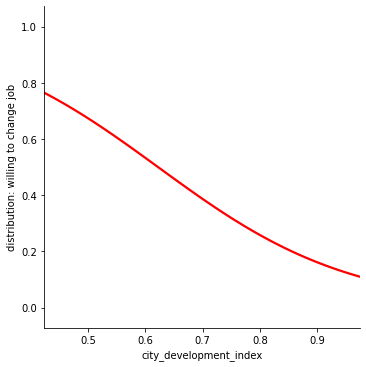

In [16]:
regplot('city_development_index')

**Figure 9:** Logistic regression of 'city_development_index' for 'willing to change job'.
***

## 4.2. Results related to the current employer (size & type)
***
The variable with the second-highest SHAP value is 'Company_size_no_info'. Figure 8 shows that
most values of the variable are low (blue) and negative (left of 0 value). This means that candidates
who do not work in a company about whose size no information is available are less likely to decide
to change jobs. What can we do with this insight? The question is whether there is a pattern that
shows that certain candidates have not provided this data. Are they possibly job beginners who do
not yet work in a company? 

A closer examination of the subgroup 'company size no info' shows that
there are no noticeable patterns in the variables 'city', 'gender', and 'enrolled_university'. But there is
a 90.17% coverage with the subgroup 'no info' of the variable 'company_type'. This does not provide
any additional insight. In the variable 'education_level' 56.46% belong to the subgroup 'Graduate' -
which is also not noticeable since this subgroup is most frequently represented in the entire data set.
The distribution of subgroups in the variable 'experience_group' is shown in Figure 10. One would
expect all to be in the '&lt;5' subgroup if they were entry-level workers. However, this is only the case
for 36.48%. Thus, no clear pattern is evident. Therefore, we cannot make a meaningful hypothesis.
The knowledge gained from this finding is negligible due to the lack of data on this variable. For this
reason, the variable with the second strongest SHAP-value is not to be used for further study.


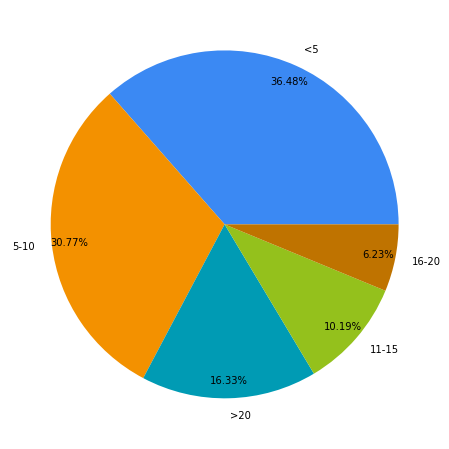

In [17]:
pie_plot_cs_no_info('experience_group')

**Figure 10:** Distribution of the subgroups of the variable 'experience_group' for the subset for
which no information is available regarding the company type.
***


The next variable in the SHAP summary plot is ‘Currently_in_Pvt_Ltd' – another subgroup of the
original variable 'company_type'. Figure 8 shows that most values of the variable are high (red) and
negative (left of 0 value). This means that candidates working in a Pvt Ltd company will less decide to
change jobs. In the raw data, the category Pvt Ltd' is the most frequent, and 75.41% of all candidates
have this value. However, if we look at the proportion of candidates willing to change the job per
category, we see that the proportion for 'Pvt Ltd' is the second-lowest (Figure 11). This supports the
result of the analysis of the SHAP values.

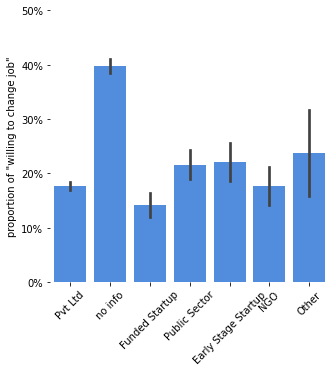

In [18]:
prop_candidate('company_type', 5)

**Figure 11:** Proportion of candidates willing to change job per category of the variable
'company_type'.
***

## 4.3. Results to the education
***

The variable with the fourth-highest value in the SHAP summary plot is 'Graduate'. Figure 8 shows
that the values of the variable are either low (blue) and negative (left of 0 value) or high and positive.
This means that candidates who graduated will more decide to change the job. A check of the raw
data can confirm this result: The highest education level of most candidates is 'Graduate' (62.03%)
and also the proportion of candidates willing to change job has the highest value for 'Graduate'
(Figure 12). This supports the result of the analysis of the SHAP values.

The last of the top ten variables in the SHAP summary plot is 'High_School'. Figure 8 shows that the
values of the variable are low (blue) and positive (right of 0 value) or high and negative. This means
that candidates with the highest educational level 'high school' will less decide to change the job.
Data shown in Figure 12 do not confirm this result: the proportion of candidates willing to change job
has a value in the middle for 'High School', but it is not the lowest. Therefore, the finding on
‘High_School’ is not further considered.


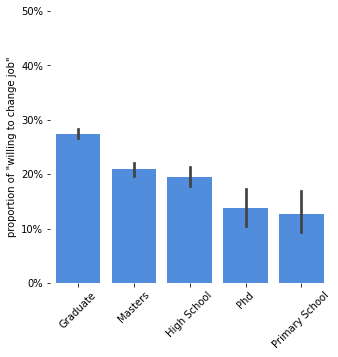

In [19]:
prop_candidate('education_level',5)

**Figure 12:** Proportion of candidates willing to change job per category of the variable
'education_level'.
***

## 4.4. Results to relevant experience in Data Science
***
The next variable in the SHAP summary plot is 'Experience_in_data_science'. Figure 8 shows that
most values of the variable are high (red) and negative (left of 0 value). This means that candidates
with experience in Data Science will less decide to change jobs. In the raw data, the category 'Has
relevent experience' is the most frequent, and 71.99% of all candidates have this value. If we look at
the proportion of candidates willing to change the job per category, we see that the proportion for
'No relevant experience' is higher than for 'Has relevant experience' (Figure 13). This supports the
result of the analysis of the SHAP values.

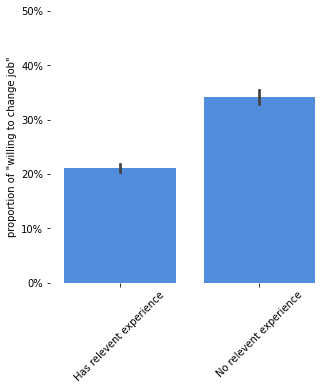

In [20]:
prop_candidate('relevent_experience', 5)

**Figure 13:** Proportion of candidates willing to change job per category of the variable
'relevent_experience'.
***

## 4.5. Results to the last new job
***
The next variable on the SHAP summary plot is 'Last_new_job_never'. Figure 8 shows that values of
the variable are low (blue) and positive (right of 0 value) and high and negative. This means that
candidates who have never had a last new job will less decide to change jobs. The raw data of the
variable 'experience' does not confirm this result. Only 2452 candidates fall into this category – which
is not under the top-three frequencies. However, if we look at the proportion of candidates willing to
change the job per category, we see an opposite distribution: the proportion for 'never' is the highest
compared to all other categories (Figure 14). These findings do not support the result of the analysis
of the SHAP values. Therefore, this variable is not further considered.

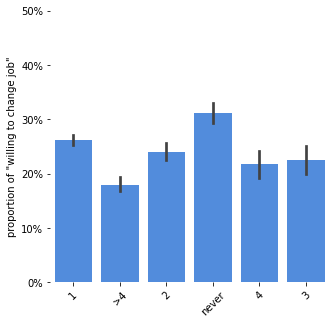

In [21]:
prop_candidate('last_new_job', 5)

**Figure 14:** Proportion of candidates willing to change job per category of the variable
''last_new_job'.
***

## 4.6. Results to working experience
***
The next two variables in the SHAP summary plot are 'Work_ experience_up_to_5_years' and 'Work_
experience_more_than_20_years' - so it is about candidates with either low or high working
experience. Figure 8 shows that most values of the variable 'Work_ experience_up_to_5_years' are
low (blue) and negative (left of 0 value) and high and positive. This means that candidates with up to
five years of job experience will more decide to change the job.

For the variable 'Work_ experience_more_than_20_years' Figure 8 shows that most values are low
(blue) and positive (right of 0 value) and high and negative. This means that candidates with more
than 20 years of experience will less decide to change the job. The raw data of the variable
'experience' confirms both findings. If we look at the proportion of candidates willing to change the
job per category, we see the proportion for '&gt;20' is the lowest and for '&lt;5' it is the highest. These
findings strengthen the result of the analysis of the SHAP values (Figure 15).

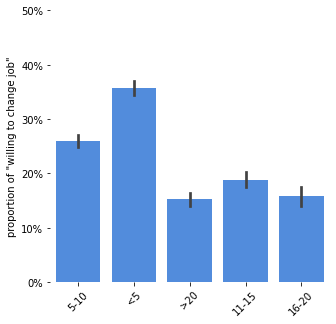

In [22]:
prop_candidate('experience_group', 5)

**Figure 15:** Proportion of candidates willing to change job per category of the variable
'experience'.
***

## 4.7. Results to study at a university
***
The ninth of the top ten variables in the SHAP summary plot is 'No_course'. Figure 8 shows that the
values of the variable are either low (blue) and positive (right of 0 value) or high and negative. This
means that candidates who have not enrolled in a university course will less decide to change the
job. Taking the raw data, if we look per category at the proportion of candidates willing to change
job, we can see in Figure 16 that the proportion is lowest among those who belong to the category
'no_enrollment'. These findings support the result of the analysis of the SHAP values.

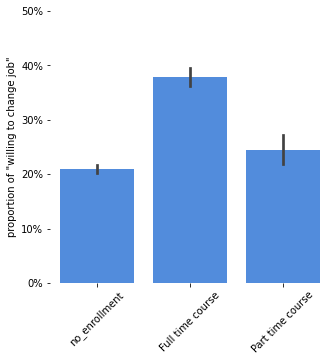

In [23]:
prop_candidate('enrolled_university', 5)

**Figure 16:** Proportion of candidates willing to change the job per category of the variable
'enrolled_university'.
***

## 4.8. Result summary
***
The variables 'gender', 'city', 'major discipline', and 'trainings_hours' were not under the top half of
the SHAP values. They can be considered irrelevant to predicting whether a candidate would be
willing to change jobs.

In summary, I identified seven variables from five different domains that are relevant for predicting
whether a candidate is willing to change job and for which a test has proven that the correlation with
the dependent variable is not random. The five domains are: 'city development', 'company type of
current employer', 'education', 'subject-specific knowledge in Data Science', and 'working
experience'. The influence of the variable 'city_development_index' is so substantial that it also comes through when the effects of the second and third strongest variables are presented (Figures 17
&amp; 18).

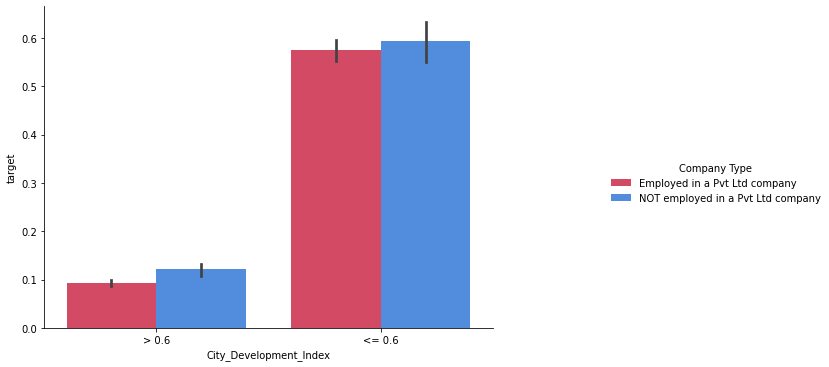

In [24]:
cat_plot('Company Type')

**Figure 17:** Proportion of candidates willing to change the job per category of the 'Company
Type' variable - split by City Development Index '&lt;=0.6' and '&gt;0.6'.
***


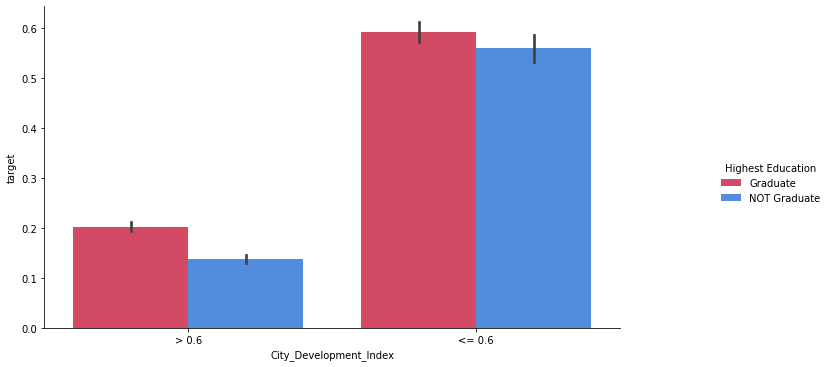

In [25]:
cat_plot('Highest Education')

**Figure 18:** Proportion of candidates willing to change the job per category of the 'Highest
Education' variable - split by City Development Index '&lt;=0.6' and '&gt;0.6'.
***

Therefore, I want to emphasize that the key finding of my study is the strong impact of the variable
'city_development_index' on the willingness to change the job.


<a name="header5"></a>
# **5. Discussion and Conclusion**
***
This study aimed to find out what characteristics and demographics inherent in the candidate drive
the willingness to change jobs. For this purpose I have conducted a three-step analysis process, that first identified the importance
of variables in patterns and relationships of a machine-learning model, second, evaluated the
stochastic independence of the obtained results, and third verified the results with descriptive and
inferential statistics.


In the analysis, I have identified seven variables in five different domains that are relevant for
predicting whether a candidate is willing to change the job. I have found that the impact of the
variable 'city_development_index' is the strongest for predicting whether a candidate is willing to
change job. The relationship between city development index and willingness to change the job has
not been extensively researched yet. Some publications deal with the willingness to change the job in
the context of migration. These publications show that people are willing to move to other countries
for the sake of a job because they cannot find suitable employment in their country of origin [[20]](#20).
Some other publications show that people from rural areas flee because of a lack of employment
opportunities [[21]](#21). Both migration and depopulation of rural areas focus on the lack of employment
opportunity as a cause. This may be closely related to a city's development index. At the same time,
other factors such as infrastructure, waste, and health system play a role in the city development
index, and the publications about migration and depopulation say little about these influencing
factors.


I could identify other characteristics that have an influence. Candidates who work in a Pvt Ltd
company are less likely to choose to change jobs. Whether an employee leaves his current employer
to move to another varies from company type to company type. Publications show that the reasons
for higher turnover rates in start-up companies are, for example, that a lot is invested in recruiting
but little in employee development and that there is no long-term product strategy. As a result, many
employees of start-up companies leave after just a few years [[22]](#22)[[23]](#23). Other publications on
retention risks in another type of company - NGOs - indicate that employees there leave their jobs because the pay and career opportunities are often perceived as poor, and they experience the way
NGOs are run as not professional enough [[24]](#24). Private limited companies, on the other hand, often
emphasize a strong leadership culture, good pay, and resilience programs that make it clear to
employees that they are perceived as important [[25]](#25). Therefore, it is fair to say that the results of my
analysis are consistent with the findings of other publications.


The analysis of the SHAP values also shows an influence of two variables related to the education of a
person. The results show that candidates who graduated will more decide to change the job, while
candidates who have not enrolled in any university course will less decide to change the job.
Numerous publications show that people seek higher education because they hope it will pay them
more and they see their education as the key to getting a good job [[26]](#26). They are therefore more
likely to change jobs if it brings them closer to the goal of higher pay. However, most publications
focus on the incentive of higher compensation. In principle, it could be argued that an academic
education develops a greater degree of openness to the world, curiosity about new things, and
willingness to engage with new things. Whether an academic education per se - detached from the
pay - influences the willingness to change jobs remains an open question that is worth investigating
further.


The result on the variable of relevant experience in Data Science shows candidates with experience
in Data Science will less decide to change jobs. This result is consistent with publications, such as the
study from the Bureau of Labor Statistics (BLS) in 2018, which shows that the average retention rate
of people in the computer industry is higher than in other industries [[27]](#27). At the same time, other
publications show that applicants from the tech industry are often in high demand and therefore can
be picky about finding a job but are generally open to job changes [[1]](#1)[[28]](#28). The result of my study
should therefore raise the question for the company about which this data was collected, whether
the analysis result means that the applicants with Data Science experience are not willing to change
jobs due to the generally longer retention or whether the company is not the first choice among Data
Science applicants.


The analysis of the SHAP values also shows an influence of two variables related to the 'working
experience': candidates with more than 20 years of experience will less decide to change the job and
candidates with up to five years of experience will more decide to change the job. This is also
consistent with recent publications, which give private commitments (children, mortgage on an
apartment or house) as a reason for remaining in the company among people who have a high level
of professional experience and correspondingly mature age. These obligations make them less willing
to take a risk associated with a job change [[29]](#29)[[30]](#30). In contrast, publications about millennials
starting their first jobs in firms show that they are less emotionally attached to their employer and
therefore change jobs frequently to expand their experiences [[31]](#31). However, most of the study
results are only indirectly related to the total duration of employment and are more related to age
and generation. The dataset in my study does not include the variable ‘age’. I recommend including
this variable in the future if the topic is to be researched further.


The strengths of the work certainly lie in the three-stage analysis process as it combines modern
methods from machine learning with classical static evaluations. By using the SHAP-value method, I
was able to analyze and visualize the prediction values of a complex algorithm. Without this method,
I could have used only two regression analyses and methods of descriptive statistics and the gain of
knowledge would have been smaller and less secured. By using the chi²-test, I was able to test the
significance of the correlations of the individual variables and exclude those that had significance in
the machine learning algorithm in the overall analysis but did not show a significant relationship with
the dependent variable when detached. The third step in the analysis process - the final sense check
using frequency analysis - shows that the results are robust. The logistic regression confirmed that a variable could be retained. My initial hypothesis was that there are characteristics, experiences,
demographic facts that increase the willingness to change jobs, and my study shows that this
hypothesis cannot be rejected.


Mainly three points could be seen as limitations of the work. Firstly, it is unfavorable that the data
set is imbalanced. However, by oversampling, I could ensure that the model was trained on a
balanced data set. Second, the fact that the variable 'company size' has no info for almost one-third
of the candidates is critical because it can lead to useless results: what does it mean if candidates
with a company type 'no info' show a certain behavior? We do not know! My recommendation for
possible follow-up studies is to collect the data as complete as possible for all variables.
The third limitation I see is that many variables are at a low scale level. This is not ideal. More
variables at the cardinal level would have made it possible to conduct further testing and
multivariate methods such as factor analysis. Factor analysis would have been able to show how
variables are related to each other. This would have provided additional insight beyond XGBoost
algorithm. The creator of the dataset missed some opportunities at higher scale levels, e.g., company
size could have been captured as a cardinally scaled variable. Finally, I would recommend expanding
the selection of variables. Numerous studies show that the age, family situation, and income
situation of candidates play a role for the willingness to change jobs. If these facts were additionally
considered, the validity of the study would be strengthened.


In the next step, it makes sense to integrate the missing but, according to other publications,
relevant characteristics such as age, family situation, and income situation of the candidates in a
follow-up study. Furthermore, the finding that the city development index has a decisive influence on
the willingness to change the job is an important result. Here, absolute index values were used as a
basis. In the next study it would be interesting to calculate relative index differences and analyze
their impact:
    
(index of the city where the candidate lives) - (index of the city where the company is located) =
relative city development index gap

With a measurement 'relative city development index gap', companies could determine the target
cities and areas where their recruiting activities bring the highest success, depending on the gap to
the company location. This could be a second focus for further studies. The third focus could be to
analyze the city development index in more detail. It is composed of five indices and it could be
interesting to find out whether all five have an equal impact on the predictability of the willingness to
change the job. However, if one index had a significantly larger impact, it would further concretize
the predictive model.


The result of this study provides important insights into the willingness to change the job and at the
same time raises questions that go far beyond this. Perhaps HR managers who want to hire data
scientists will read my study and consider how they can integrate the findings into their recruiting
strategy. Or maybe managers of data scientists will read this study and wonder what they can do to
keep their employees from taking a job in a city that has a higher development index. But perhaps
people who do live in cities with a low development index are also reading this study. These people
read about the 'willingness to change the job' and might realize that for them it does not feel so
much like 'willingness' but more like 'necessity to change the job'. Perhaps for them, changing jobs
provides the only opportunity to achieve a better life for themselves and their family. Perhaps they
would like to stay in the city where they live if living conditions were better there. And how do we as
a society deal with the fact that some people can change jobs because they genuinely want to, and
others have to change jobs because they see no other choice for themselves? Wouldn't our society
be a better one if all people had a real choice to decide for or against a new job? Aren't our politicians, the managers of companies, those responsible in municipal offices in the cities, all of us as
a society responsible for creating conditions in our cities that are perceived as livable - conditions
that are so livable for city residents that they do not accept job offers from other cities just because
you can live a supposedly better life there?


This study offers more than just a recipe for recruiters on which candidates to focus on to ensure job
offers are successfully accepted. This study is a wake-up call to all of us to pay attention to what truly
positively motivates people to change the job. My findings that people who work in a private limited
company, or have more than 20 years of work experience, or have experience in Data Science have a
low percentage of job changers are important findings. The influence of academic education on the
willingness to change jobs is also an important finding. However, the fact that the city development
index has the strongest influence, outweighing all other influencing variables, must give us particular
pause for thought. We need to better understand this major influence. Only then can we eliminate
grievances. Only then can people freely decide whether they want to change jobs or not. Only then
can we conclusively answer the question 'who is truly willing to change the job'.



***
<a name="comment">[*] = the wrong spelling of words is taken from the data set</a>

<a name="header6"></a>
# **6. References**
***

<a name="1">
[1] https://www.glassdoor.com/employers/blog/why-candidates-reject-job-offers/</a>
<br><br>
<a name="2">
[2] https://recruitingdaily.com/7-big-reasons-people-change-jobs/</a>
<br><br>
<a name="3">
[3] https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/inferential-statistics/#:~:text=Descriptive%20statistics%20describes%20data%20</a>
<br><br>
<a name="4">
[4] https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php#:~:text=Descriptive%20statistics%20are%20very%20important,simpler%20interpretation%20of%20the%20data.</a>
<br><br>
<a name="5">
[5] https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd#:~:text=In%20simple%20terms%2C%20an%20unbalanced,specific%20class%20than%20the%20others.&text=Besides%2C%20the%20problem%20is%20that,class%20or%20classify%20unseen%20observations</a>
<br><br>
<a name="6">
[6] https://en.wikipedia.org/wiki/City_development_index</a>
<br><br>
<a name="7">
[7] https://learn.datacamp.com/courses/extreme-gradient-boosting-with-xgboost</a>
<br><br>
<a name="8">
[8] https://en.wikipedia.org/wiki/Overfitting</a>
<br><br>
<a name="9">
[9] https://xgboost.readthedocs.io/en/latest/parameter.html</a>
<br><br>
<a name="10">
[10] https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/#:~:text=A%20dummy%20classifier%20is%20a,data%20using%20only%20simple%20rules.&amp;text=Stratified%3A%20It%20generates%20predictions%20by,distribution%20of%20the%20training%20data.</a>
<br><br>
<a name="11">
[11] https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/</a>
<br><br>
<a name="12">
[12]https://towardsdatascience.com/sampling-79075e9176cb</a>
<br><br>
<a name="13">
[13] https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd</a>
<br><br>
<a name="14">
[14] https://www.nature.com/articles/s41467-019-12552-4</a>
<br><br>
<a name="15">
[15] https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/#:~:text=Evaluate%20XGBoost%20Models%20With%20k,5%20or%20k%3D10).</a>
<br><br>
<a name="16">
[16] https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d</a>
<br><br>
<a name="17">
[17] https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30#:~:text=In%20a%20nutshell%2C%20SHAP%20values,answer%20the%20%E2%80%9Chow%20much%E2%80%9D.</a>
<br><br>
<a name="18">
[18] https://www.statisticssolutions.com/what-is-logistic-regression/?__cf_chl_jschl_tk__=4bcda5bdf276ee81c1eea92fc748e028ac3ce4bd-1619900910-0-AS2JSMMc2mriSpOb9mtwzB_uvXbLx4rBNxC9CK5RrQRY0gBaLuSyyLVhVBzgtSM8xFNmLBNqc-Jkw24vIgrMpRoLU2lp1uQrbLZbCdGyK6ZZJsU-lxHa5izn6zKBxxPhuQQq1vbDvUJvpgad4uq5dImP6mxBDQljim3Ummi8UpCNSahRBAg-HLq7fS2qkmbuMLjYvrDNTdz5-I40wS2C448A_WDBNJ1R8Wk9IKsrDM67inDk5NphjNR4hFD_lexDp_G7H5GbHgqzkrVhdD7VUP4n24POjQiuqJqedmg62_tdnlBG78F6guhLd41ma2F3iAr8QZ2X6RYS6HkpGAzu-FawhSrdJhLV87Nu5uWaCdg_61wc0OMudNfAnmRbVOn9aFoVJMbMOHfFyQ5L2JZi6BManXaaI6MQ6tCsIvYDo3k9idJ4HA7prUxB3hUKE3i1og</a>
<br><br>
<a name="19">
[19] https://www.kaggle.com/dansbecker/shap-values</a>
<br><br>
<a name="20">
[20] https://www.mckinsey.com/featured-insights/employment-and-growth/technology-jobs-and-the-future-of-work</a>
<br><br>
<a name="21">
[21] https://www.jstor.org/stable/20459907?seq=1</a>
<br><br>
<a name="22">
[22] https://marker.medium.com/how-to-fix-the-employee-turnover-problem-at-tech-startups-2ebd3b8e2e68</a>
<br><br>
<a name="23">
[23] https://www.founderscircle.com/high-startup-turnover-rate/</a>
<br><br>
<a name="24">
[24] https://www.forbes.com/sites/chrisstrub/2020/02/10/nonprofithr/?sh=52af5b9115ca</a>
<br><br>
<a name="25">
[25] https://www.tinypulse.com/blog/employee-retention-examples</a>
<br><br>
<a name="26">
[26] https://www.brookings.edu/blog/up-front/2012/09/17/education-is-the-key-to-better-jobs/</a>
<br><br>
<a name="27">
[27] https://www.thebalancecareers.com/job-tenure-and-the-myth-of-job-hopping-2071302</a>
<br><br>
<a name="28">
[28] https://www.theladders.com/career-advice/study-almost-50-of-people-in-technology-are-planning-a-career-change</a>
<br><br>
<a name="29">
[29] https://www.thebalancecareers.com/career-change-at-40-4152909</a>
<br><br>
<a name="30">
[30] https://www.economist.com/finance-and-economics/2017/10/21/workers-are-not-switching-jobs-more-often</a>
<br><br>
<a name="31">
[31] https://www.gallup.com/workplace/231587/millennials-job-hopping-generation.aspx</a>